# Project 3: Regression

Importing Libraries 

In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Reading and Describing Data

In [3]:
df = pd.read_csv("realtor-data.csv") 

In [4]:
df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

In [5]:
df.shape

(923159, 12)

In [6]:
df.isnull().sum()

status               0
price               71
bed             131703
bath            115192
acre_lot        273623
full_address         0
street            2138
city                74
state                0
zip_code           205
house_size      297843
sold_date       466763
dtype: int64

In [7]:
df = df.dropna() #dropped rows that have a null value 

In [8]:
df.isnull().sum()

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
sold_date       0
dtype: int64

In [9]:
#only keeping price, state/region, and sold_date
df.drop("status", axis = 1, inplace=True)
df.drop("full_address", axis = 1, inplace=True)
df.drop("bed", axis = 1, inplace=True)
df.drop("bath", axis = 1, inplace=True)
df.drop("street", axis = 1, inplace=True)
df.drop("city", axis = 1, inplace=True)
df.drop("zip_code", axis = 1, inplace=True)
df.drop("acre_lot", axis = 1, inplace=True)
df.drop("house_size", axis = 1, inplace=True)

In [10]:
df.columns

Index(['price', 'state', 'sold_date'], dtype='object')

In [11]:
#Renaming columns 
df.rename(columns = {'price':'Price', 
                     'state':'State',
                     'sold_date': 'Year'}, 
          inplace = True)

In [12]:
df.dtypes

Price    float64
State     object
Year      object
dtype: object

In [13]:
#converting date sold object to date
from datetime import datetime
df['Year'] = pd.to_datetime(df['Year']) 
df.dtypes

Price           float64
State            object
Year     datetime64[ns]
dtype: object

In [14]:
#changing date sold to m-d-y format and only getting the year
df["Year"] = df["Year"].dt.year 
df.head()

,Price,State,Year
829,110000.0,Puerto Rico,2019
3380,110000.0,Puerto Rico,2019
5083,110000.0,Puerto Rico,2019
5387,110000.0,Puerto Rico,2019
9053,110000.0,Puerto Rico,2019


In [15]:
#removing rows with states outside of the USA
df = df[df.State != "Puerto Rico"]
df = df[df.State != "Virgin Islands"]
df.head()

,Price,State,Year
24237,525000.0,Massachusetts,2014
24238,289900.0,Massachusetts,2012
24244,384900.0,Massachusetts,1986
24251,199999.0,Massachusetts,2008
24258,419000.0,Massachusetts,2005


In [16]:
df.reset_index(drop=True) #adjusting the indexes

,Price,State,Year
0,525000.0,Massachusetts,2014
1,289900.0,Massachusetts,2012
2,384900.0,Massachusetts,1986
3,199999.0,Massachusetts,2008
4,419000.0,Massachusetts,2005
...,...,...,...
231956,589999.0,New York,2003
231957,825000.0,New York,1998
231958,445000.0,New York,2011
231959,418000.0,New York,2015


Data-Understanding

In [17]:
#changing datatypes to visualize
df["Year"] = pd.to_numeric(df["Year"])
df["Price"] = df["Price"].astype('int')
df.dtypes

Price     int32
State    object
Year      int64
dtype: object

In [18]:
#filtering year column to only be from 2000-2022 except 2002 becuase of outlier
df = df.loc[df['Year'].isin([2000, 2001, 2003, 2004, 2005, 2006, 
                        2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                        2014, 2015, 2016, 2017, 2018, 2019, 2020, 
                        2021, 2022])]

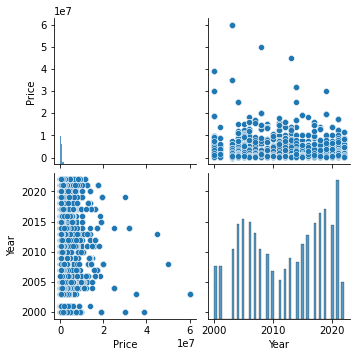

In [19]:
sns.pairplot(data = df)

In [20]:
#getting diff states
df.State.unique()

array(['Massachusetts', 'Connecticut', 'New Hampshire', 'Vermont',
       'New York', 'Rhode Island', 'Maine', 'New Jersey', 'Pennsylvania',
       'Delaware'], dtype=object)

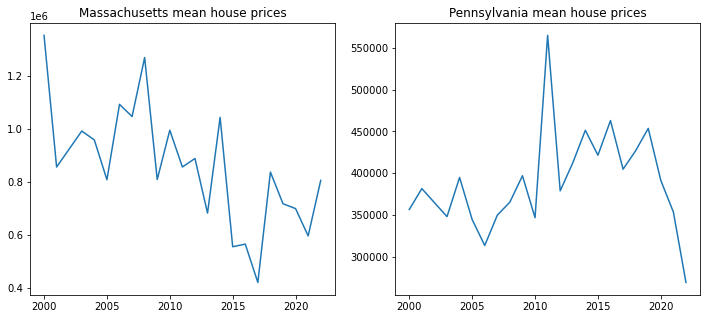

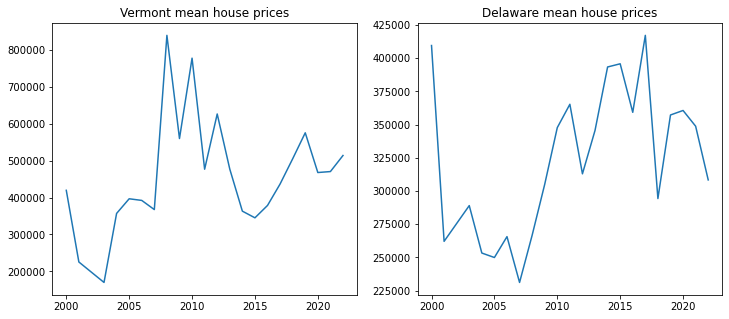

In [21]:
#looking at different states and their prices over the years to see trends 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))
ax1.plot(df[df["State"] == "Massachusetts"].groupby(by= "Year")["Price"].mean())
ax1.set_title("Massachusetts mean house prices")
ax2.plot(df[df["State"] == "Pennsylvania"].groupby(by= "Year")["Price"].mean())
ax2.set_title("Pennsylvania mean house prices")
fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (12,5))

ax3.plot(df[df["State"] == "Vermont"].groupby(by= "Year")["Price"].mean())
ax3.set_title("Vermont mean house prices")
ax4.plot(df[df["State"] == "Delaware"].groupby(by= "Year")["Price"].mean())
ax4.set_title("Delaware mean house prices")

plt.show()

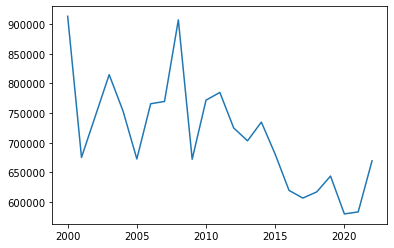

In [22]:
#creating average prices for each year based on all states
df_avg = df.groupby(by="Year")["Price"].mean()
plt.plot(df_avg)

Experiment 1: Pre-processing

In [23]:
State_To_Float = {
    "Massachusetts": 1,
    "Connecticut": 2,
    "New Hampshire": 3,
    "Vermont": 4,
    "New York": 5,
    "Rhode Island": 6,
    "Maine": 7,
    "New Jersey": 8,
    "Pennsylvania": 9,
    "Delaware": 10,
}

In [24]:
#changeing state names to abreviations 
df['State'] = df['State'].map(State_To_Float) 

In [25]:
df.head()

,Price,State,Year
24237,525000,1,2014
24238,289900,1,2012
24251,199999,1,2008
24258,419000,1,2005
24268,275000,1,2021


In [26]:
df.reset_index(drop=True) #adjusting the indexes

,Price,State,Year
0,525000,1,2014
1,289900,1,2012
2,199999,1,2008
3,419000,1,2005
4,275000,1,2021
...,...,...,...
175153,569900,5,2015
175154,589999,5,2003
175155,445000,5,2011
175156,418000,5,2015


Experiment 1: Modeling

In [27]:
X = df.drop(columns = ['Price']) # note: only drop target
                                # keep state and year
y = df['Price']

In [28]:
df.dtypes

Price    int32
State    int64
Year     int64
dtype: object

In [29]:
## split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [30]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((122610, 2), (122610,), (52548, 2), (52548,))

In [31]:
from sklearn import linear_model

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y
lr_model = lr.fit(X_train, y_train)

In [32]:
import statsmodels.api as sma

## We add a constant to allow OLS to take into account the y-intercept
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()

#call the summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     397.8
Date:                Sun, 23 Oct 2022   Prob (F-statistic):          5.97e-173
Time:                        11:24:33   Log-Likelihood:            -1.8868e+06
No. Observations:              122610   AIC:                         3.774e+06
Df Residuals:                  122607   BIC:                         3.774e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.609e+07   1.04e+06     15.442      0.0

In [33]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 16091769.392491989
Model Slope: -24676.90323859749
Coefficient of Determination: 0.006372214379307017


,Coefficients
State,-24676.903239
Year,-7597.675502


Experiment 1: Visualization

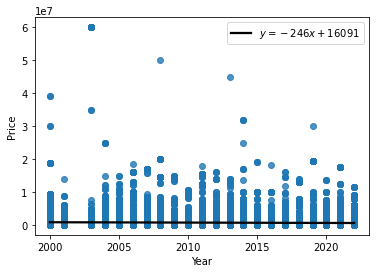

In [34]:
import matplotlib.pyplot as plt

#line_kws lets us change up some things about the line in the plot. Change the color here so you can see it against the points, but also where you can put your slope formula
#the '$y=%3.7s*x+%3.7s$'is what will format the coefficient and intercept as the line function y=mx + b
# more info on using % to format here: https://docs.python.org/3/library/stdtypes.html#str.format
# or here: https://www.geeksforgeeks.org/string-formatting-in-python/
plot_rnet = sns.regplot(data = df,x="Year", y="Price",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()


Experiment 1: Evaluation

In [35]:
y_pred = lr_model.predict(X_test)

In [36]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 490614.14554341027
Mean Square Error: 1729609699410.4526
Root Mean Square Error: 1315146.2654056593


Experiment 2: Pre-Processing

In [37]:
df1 = pd.DataFrame(df_avg)

In [38]:
Year = [2000, 2001, 2003, 2004, 2005, 2006, 
                        2007, 2008, 2009, 2010, 2011, 2012, 2013, 
                        2014, 2015, 2016, 2017, 2018, 2019, 2020, 
                        2021, 2022]
df1['Year'] = Year

In [39]:
df1.columns

Index(['Price', 'Year'], dtype='object')

In [40]:
df1.head(22)

,Price,Year
Year,,
2000,913108.998557,2000
2001,675227.327649,2001
2003,814646.237932,2003
2004,753566.115805,2004
2005,672597.817378,2005
2006,765634.770804,2006
2007,769509.910174,2007
2008,906987.449150,2008
2009,672178.951031,2009


Experiment 2: Modeling

In [41]:
X = df1.drop(columns = ['Year']) # note: only drop target
                                # keep state and year
y = df1['Year']

In [42]:
df1['Price'] = df1['Price'].astype(int)
df1.dtypes

Price    int32
Year     int64
dtype: object

In [43]:
## split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [44]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((15, 1), (15,), (7, 1), (7,))

In [45]:
from sklearn import linear_model

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y
lr_model = lr.fit(X_train, y_train)

In [46]:
import statsmodels.api as sma

## We add a constant to allow OLS to take into account the y-intercept
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()

#call the summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     18.31
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           0.000897
Time:                        11:25:03   Log-Likelihood:                -41.421
No. Observations:                  15   AIC:                             86.84
Df Residuals:                      13   BIC:                             88.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2044.4747      7.755    263.628      0.0

C:\Users\devir\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [47]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df1 = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df1

Model Intercept: 2044.4746628131136
Model Slope: -4.595620360301694e-05
Coefficient of Determination: 0.3513493403535183


,Coefficients
Price,-0.000046


Experiment 2: Visualization

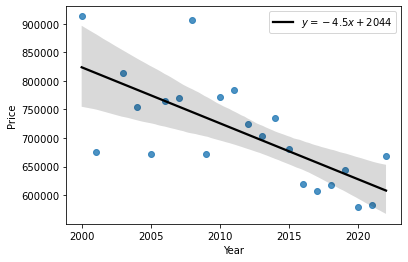

In [48]:
import matplotlib.pyplot as plt

#line_kws lets us change up some things about the line in the plot. Change the color here so you can see it against the points, but also where you can put your slope formula
#the '$y=%3.7s*x+%3.7s$'is what will format the coefficient and intercept as the line function y=mx + b
# more info on using % to format here: https://docs.python.org/3/library/stdtypes.html#str.format
# or here: https://www.geeksforgeeks.org/string-formatting-in-python/
plot_rnet = sns.regplot(data = df1,x="Year", y="Price",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})
plt.legend()


Experiment 2: Evaluation

In [49]:
y_pred = lr_model.predict(X_test)

In [50]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 4.559950024964759
Mean Square Error: 36.695094460000966
Root Mean Square Error: 6.057647601173327


Experiment 3: Pre-Processing

In [51]:
#removing 2000 (outlier), 2008 (rescission), and 2020-2022 (because covid and 2022 is not over yet)
df1 = df1.loc[df1['Year'].isin([2001, 2003, 2004, 2005, 2006, 
                        2007, 2009, 2010, 2011, 2012, 2013, 
                        2014, 2015, 2016, 2017, 2018, 2019])]

In [52]:
df1.head(17)

,Price,Year
Year,,
2001,675227,2001
2003,814646,2003
2004,753566,2004
2005,672597,2005
2006,765634,2006
2007,769509,2007
2009,672178,2009
2010,771687,2010
2011,784711,2011


Experiment 3: Modeling

In [53]:
X = df1.drop(columns = ['Year']) # note: only drop target
                                # keep state and year
y = df1['Year']

In [54]:
## split our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [55]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11, 1), (11,), (6, 1), (6,))

In [56]:
import statsmodels.api as sma

## We add a constant to allow OLS to take into account the y-intercept
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()

#call the summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     4.029
Date:                Sun, 23 Oct 2022   Prob (F-statistic):             0.0757
Time:                        11:25:04   Log-Likelihood:                -32.161
No. Observations:                  11   AIC:                             68.32
Df Residuals:                       9   BIC:                             69.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2044.3408     17.220    118.722      0.0

C:\Users\devir\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


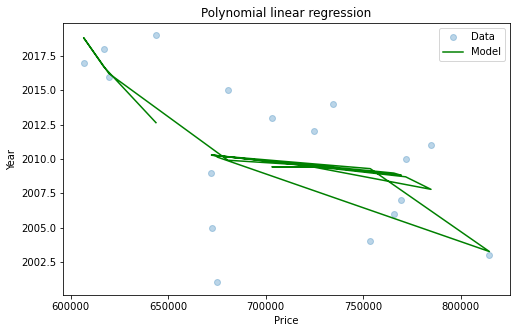

(<matplotlib.legend.Legend at 0x25346fecaf0>, None)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline

model_1 = make_pipeline(PolynomialFeatures(degree = 5),LinearRegression())
model_1.fit(X.values.reshape(-1,1),y)
plt.figure(figsize = (8,5))
plt.scatter(X,y, alpha = .3, label = 'Data')
plt.plot(X.values,model_1.predict(X.values.reshape(-1,1)), color = 'green', label = 'Model')
plt.title('Polynomial linear regression')
plt.xlabel('Price'), plt.ylabel('Year')
plt.legend(), plt.show()

Experiment 3: Evaluation

In [58]:
y_pred = model_1.predict(X_test)

C:\Users\devir\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [59]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 3.580295510708121
Mean Square Error: 17.18737470338115
Root Mean Square Error: 4.145765876575901
